# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import geopandas as gpd
from matplotlib.colors import ListedColormap
import numpy as np
from shapely.ops import unary_union
import matplotlib.patches as mpatches
from adjustText import adjust_text


In [4]:
# Estrazione nomi comuni
tammaro_titerno = "Amorosi, Campolattaro, Casalduni, Castelpagano, Castelvenere, Cerreto Sannita, Circello, Colle Sannita, Cusano Mutri, Faicchio, Fragneto l'Abate, Fragneto Monforte, Guardia Sanframondi, Morcone, Pesco Sannita, Pietraroja, Pietrelcina, Ponte, Pontelandolfo, Puglianello, Reino, San Lorenzello, San Lorenzo Maggiore, San Lupo, San Salvatore Telesino, Santa Croce del Sannio, Sassinoro, Solopaca, Telese Terme, Pago Veiano"
comuni = [comune.lstrip().rstrip() for comune in tammaro_titerno.split(",")]
print("I comuni analizzati sono:", len(comuni))

I comuni analizzati sono: 30


In [7]:
# Import Dataset
pop_campania = pd.read_csv("./Datasets/residenti_campania_2019_2023.csv")


,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITF3,Campania,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2019,2019,5740291,NaN,NaN
1,ITF3,Campania,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2020,2020,5712143,NaN,NaN
2,ITF3,Campania,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2021,2021,5624260,NaN,NaN
3,ITF3,Campania,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,5624420,NaN,NaN
4,ITF3,Campania,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2023,2023,5592175,e,dato stimato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,064121,Montoro,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2019,2019,19089,NaN,NaN
2776,064121,Montoro,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2020,2020,19160,NaN,NaN
2777,064121,Montoro,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2021,2021,19305,NaN,NaN
2778,064121,Montoro,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,19396,NaN,NaN


In [17]:
# Estrazione shapefiles per comuni e province
comuni_italia_shapes = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\Com01012023\Com01012023_WGS84.shp')
province_italia_shapes = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\ProvCM01012023\ProvCM01012023_WGS84.shp')


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vinor\AppData\Local\Temp\ipykernel_21384\287894214.py:2: SyntaxWarning: invalid escape sequence '\D'
  comuni_italia_shapes = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\Com01012023\Com01012023_WGS84.shp')
C:\Users\vinor\AppData\Local\Temp\ipykernel_21384\287894214.py:3: SyntaxWarning: invalid escape sequence '\D'
  province_italia_shapes = gpd.read_file('.\Datasets\Shapefiles\Limiti01012023\Limiti01012023\ProvCM01012023\ProvCM01012023_WGS84.shp')


In [18]:
# Crea una serie di valori booleani per ciascuna stringa nella lista
criteria_tammaro = comuni_italia_shapes['COMUNE'].isin(comuni)
comuni_tammaro_shapes = comuni_italia_shapes[criteria_tammaro]

# Selezioniano il criterio per i comuni campani
criteria_comuni_campania = comuni_italia_shapes['COD_REG'] == 15
comuni_campania_shapes = comuni_italia_shapes[criteria_comuni_campania]

# Selezioniamo il criterio per le province campane
criteria_province_campania = province_italia_shapes['COD_REG'] == 15
province_campania_shapes = province_italia_shapes[criteria_province_campania]

# Suddivisione in dataset aggregato e individuale

In [26]:
# Rimuoviamo le informazioni aggregate
pop_campania_aggregate = pop_campania[pop_campania['ITTER107'].str.startswith('IT')]
pop_campania_ind = pop_campania[~pop_campania['ITTER107'].str.startswith('IT')]

# Selezioniano l'anno 2023
pop_campania_2023 = pop_campania_ind[pop_campania_ind["Seleziona periodo"] == 2023]


# Merge con le shapes

In [27]:
comuni_campania_shapes_2023 = comuni_campania_shapes.merge(pop_campania_2023[['Territorio','Value']], left_on='COMUNE', right_on='Territorio')


In [28]:
# Estraggo i confini per Benevento
benevento = comuni_campania_shapes_2023[comuni_campania_shapes_2023['COD_PROV'] == 62]
benevento_polygon = unary_union(benevento.geometry)

# Estrai il contorno del poligono unificato
benevento_boundary = benevento_polygon.boundary
benevento_boundary_gs = gpd.GeoSeries(benevento_boundary)

# Estraggo i confini per Tammaro Titerno
tammaro_titerno_polygon = unary_union(comuni_tammaro_shapes.geometry)

# Estrai il contorno del poligono unificato
tammaro_titerno_boundary = tammaro_titerno_polygon.boundary
tammaro_titerno_boundary_gs = gpd.GeoSeries(tammaro_titerno_boundary)

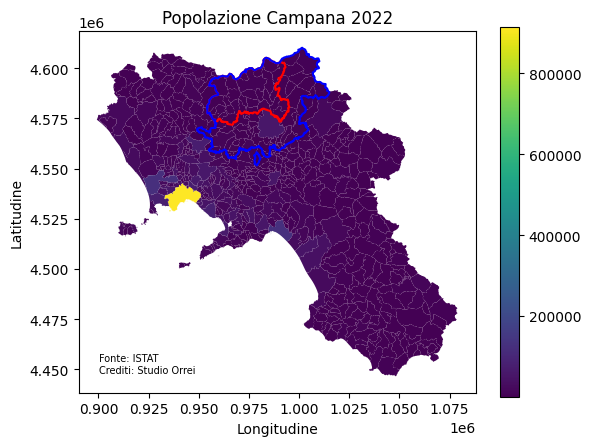

In [29]:
# Crea una figura e un asse
fig, ax = plt.subplots()

# Plotta le geometrie con colori basati sui valori della colonna 'Value'
comuni_campania_shapes_2023.plot(column='Value', ax=ax, legend=True, cmap='viridis')

tammaro_titerno_boundary_gs.plot(ax=ax, color='red')
benevento_boundary_gs.plot(ax=ax, color='blue')

# Aggiungi un titolo e etichette agli assi, se necessario
ax.set_title('Popolazione Campana 2023')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

font_properties = {'verticalalignment': 'bottom', 'horizontalalignment': 'left', 'fontsize': 7, 'color': 'black'}
ax.text(0.05, 0.05, 'Fonte: ISTAT \nCrediti: Studio Orrei', transform=ax.transAxes, **font_properties)

# Mostra il grafico
plt.show()

In [30]:
comuni_campania_shapes_2023['Value'].describe()

count       549.000000
mean      10164.832423
std       41186.546219
min         219.000000
25%        1444.000000
50%        3019.000000
75%        8677.000000
max      913462.000000
Name: Value, dtype: float64

In [45]:
# Since log(0) is undefined, we'll start from a small value close to 0, e.g., 0.1
start = np.log10(200)
stop = np.log10(920000)

# Create the bin edges
log_bins = np.logspace(start, stop, num=11)  # num is the number of bins + 1

comuni_campania_shapes_2023['RangeValue'] = pd.cut(comuni_campania_shapes_2023['Value'], bins=log_bins, labels= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], include_lowest=True)
comuni_campania_shapes_2023['RangeValue']


[2.00000000e+02 4.64842447e+02 1.08039250e+03 2.51106148e+03
 5.83623981e+03 1.35646600e+04 3.15271487e+04 7.32757847e+04
 1.70308475e+05 3.95833042e+05 9.20000000e+05]


0      4
1      3
2      1
3      4
4      4
      ..
544    7
545    5
546    5
547    1
548    6
Name: RangeValue, Length: 549, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [46]:
# Crea una mappa di colori viridis originale
viridis = plt.cm.get_cmap('viridis', 256)  # 256 è il numero di colori nella mappa di colori originale

# Crea una sequenza di 10 valori equidistanti tra 0 e 1
indices = np.linspace(0, 1, 10)

# Ottieni 10 colori dalla mappa di colori viridis originale
colors = viridis(indices)

# Crea una nuova mappa di colori con solo questi 10 colori
new_viridis = ListedColormap(colors)

C:\Users\vinor\AppData\Local\Temp\ipykernel_21384\2531046591.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)  # 256 è il numero di colori nella mappa di colori originale


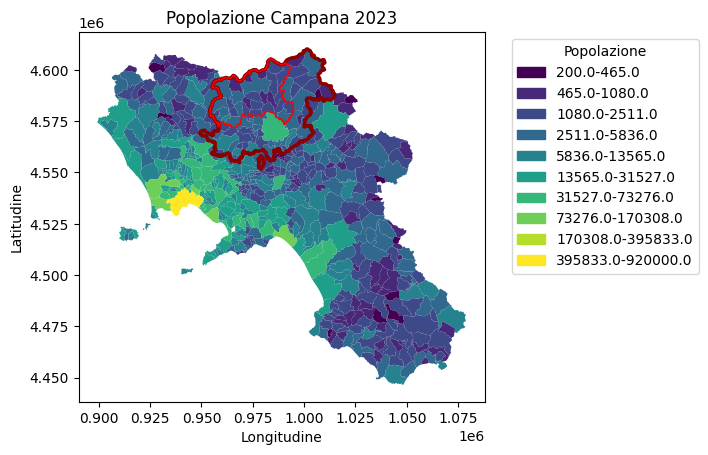

In [57]:
# Crea una figura e un asse
fig, ax = plt.subplots()

# Plotta i tuoi dati
comuni_campania_shapes_2023.plot(column='RangeValue', ax=ax, cmap=new_viridis, vmin=0, vmax=10)

labels = [str(log_bins[i].round(0)) + '-' + str(log_bins[i+1].round(0)) for i in range(len(log_bins)-1)]
#labels = ['0-500', '500-1000', '1000-1500', '1500-3000', '3000-4500', '4500-6000', '6000-7500', '7500-10000', '1000-15000', '>150000']

# Crea una lista di patch per la legenda
patches = [
    mpatches.Patch(color=new_viridis(i/10), label=f'{label}')
    for i, label in enumerate(labels)
]

# Tracciamo i contorni del Tammaro Titerno
benevento_boundary_gs.plot(ax=ax, color='darkred', linewidth=2.5)
tammaro_titerno_boundary_gs.plot(ax=ax, color='red', linewidth=1)

# Aggiungi la legenda personalizzata
ax.legend(handles=patches, title="Ranges", bbox_to_anchor=(1.05, 1), loc='upper left')

# Aggiungi un titolo e etichette agli assi, se necessario
ax.set_title('Popolazione Campana 2023')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra il grafico
plt.show()


In [90]:
df_pivot = pop_campania_aggregate.reset_index().pivot(index='TIME', columns='Territorio', values='Value')
short_names = ['AV','BN', 'Regione','CE', 'NA', 'SA']
for name, i in zip(list(df_pivot.columns), short_names):
    df_pivot[i] = ((df_pivot[name] / df_pivot[name].max())* 100).round(1)
df_pivot[short_names]

Territorio  Avellino  Benevento  Campania  Caserta   Napoli  Salerno
TIME                                                                
2019          414109     275384   5740291   915549  3048194  1087055
2020          410369     272318   5712143   913666  3034410  1081380
2021          402929     266716   5624260   901903  2986745  1065967
2022          401451     265055   5624420   905045  2988376  1064493
2023          397889     262413   5592175   903663  2969571  1058639
['Avellino', 'Benevento', 'Campania', 'Caserta', 'Napoli', 'Salerno']


Territorio,AV,BN,Regione,CE,NA,SA
TIME,,,,,,
2019,100.0,100.0,100.0,100.0,100.0,100.0
2020,99.1,98.9,99.5,99.8,99.5,99.5
2021,97.3,96.9,98.0,98.5,98.0,98.1
2022,96.9,96.2,98.0,98.9,98.0,97.9
2023,96.1,95.3,97.4,98.7,97.4,97.4


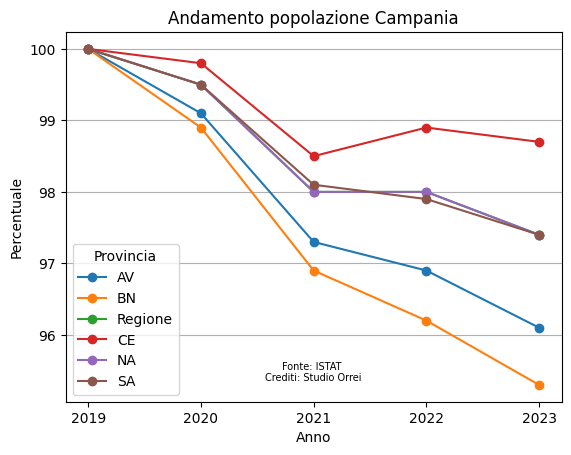

In [92]:
# Crea una figura e un asse
fig, ax = plt.subplots()

# Plotta l'andamento di ogni provincia
df_pivot = df_pivot[short_names]
df_pivot.plot(ax=ax, marker='o')

# Imposta le etichette degli assi e il titolo
ax.set_xlabel('Anno')
ax.set_ylabel('Percentuale')
ax.set_title('Andamento popolazione Campania')

# Imposta le etichette dell'asse x per mostrare solo gli anni
ax.set_xticks(df_pivot.index)
ax.set_xticklabels(df_pivot.index, rotation=0)  # Imposta le etichette dell'asse x e rimuove la rotazione

# Aggiungi solo le linee orizzontali della griglia
ax.grid(axis='y')

# Aggiungi il testo in basso a sinistra
font_properties = {'verticalalignment': 'bottom', 'horizontalalignment': 'center', 'fontsize': 7, 'color': 'black'}
ax.text(0.5, 0.05, 'Fonte: ISTAT \nCrediti: Studio Orrei', transform=ax.transAxes, **font_properties)

# Mostra il grafico
plt.legend(title='Provincia')
plt.show()
